In [11]:
import os
import pandas as pd
import seaborn as sns
import csv
import networkx as nx

from matplotlib import pyplot as plt
from sklearn.preprocessing import MinMaxScaler #for normalization

In [12]:
path = os.getcwd()

In [13]:
##reading the file

data = pd.read_csv("C:\\Users\\SAMSUNG\\Documents\\GitHub\\Autonomous-Systems\\11_Autonomous_Systems.csv", index_col=0)

In [14]:
data

,Zeus,Hera,Poseidon,Demeter,Athena,Apollo,Artemis,Ares,Aphrodite,Hephaestus,...,Hestia,Dionysus,Granite,Mica,Shale,Quartz,Ruby,Atlas,Ryoken,Vulture
ComputerNumber,,,,,,,,,,,,,,,,,,,,,
1,0,0,0,0,1,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
2,0,0,0,0,1,0,0,0,0,0,...,1,0,0,1,0,0,0,0,0,0
3,0,0,0,1,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,0,0,0,1,0,0,0,0,0,1,...,0,0,1,0,0,0,0,0,1,1
5,0,0,0,0,1,0,0,0,0,1,...,0,0,1,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149,0,0,0,0,1,0,0,1,0,0,...,0,0,1,0,0,0,0,0,0,1
150,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
151,0,0,0,0,1,0,0,1,0,0,...,0,0,1,0,0,0,0,0,0,0


<br>

<font size="5"> **PREPROCESSING AND EXPLORING DATA**</font>

<br>

In [15]:

data.describe()

,Zeus,Hera,Poseidon,Demeter,Athena,Apollo,Artemis,Ares,Aphrodite,Hephaestus,...,Hestia,Dionysus,Granite,Mica,Shale,Quartz,Ruby,Atlas,Ryoken,Vulture
count,153.000000,153.000000,153.000000,153.000000,153.000000,153.000000,153.000000,153.000000,153.000000,153.000000,...,153.000000,153.000000,153.000000,153.000000,153.000000,153.000000,153.000000,153.000000,153.000000,153.000000
mean,0.150327,0.052288,0.058824,0.065359,0.339869,0.111111,0.065359,0.300654,0.111111,0.130719,...,0.071895,0.071895,0.450980,0.078431,0.052288,0.104575,0.078431,0.052288,0.104575,0.111111
std,0.358565,0.223337,0.236067,0.247971,0.475220,0.315302,0.247971,0.460048,0.315302,0.338200,...,0.259163,0.259163,0.499225,0.269732,0.223337,0.307010,0.269732,0.223337,0.307010,0.315302
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [16]:
#total number of columns
data.shape[0]

153

In [17]:
#total number of rows
data.shape[1]

21

In [18]:
##to check the total of any missing values in the dataset
data.isnull().any().sum()

0

In [21]:
max(data.sum(axis=1))

7

In [20]:
#total number of computers in dataset
getNumIn = data.shape[0]

In [22]:
###I THINK 0 IS FOR NOT CONNECTED AND 1 IS FOR CONNECTED

In [23]:
connectedToServer = data[data['Zeus'] == 1]
NotconnectedToServer = data[data['Zeus'] == 0]
print(f"Num of Zeus that has no connection to computer is {len(NotconnectedToServer)}")
print(f"Num of Zeus connection to computer is {len(connectedToServer)}")

Num of Zeus that has no connection to computer is 130
Num of Zeus connection to computer is 23


In [24]:
connectedToServer = data[data['Hera'] == 1]
NotconnectedToServer = data[data['Hera'] == 0]
print(f"Num of Hera that has no connection to computer is {len(NotconnectedToServer)}")
print(f"Num of Hera connection to computer is {len(connectedToServer)}")

Num of Hera that has no connection to computer is 145
Num of Hera connection to computer is 8


In [25]:
connectedToServer = data[data['Poseidon'] == 1]
NotconnectedToServer = data[data['Poseidon'] == 0]
print(f"Num of Poseidon that has no connection to computer is {len(NotconnectedToServer)}")
print(f"Num of Poseidon connection to computer is {len(connectedToServer)}")

Num of Poseidon that has no connection to computer is 144
Num of Poseidon connection to computer is 9


In [26]:
connectedToServer = data[data['Demeter'] == 1]
NotconnectedToServer = data[data['Demeter'] == 0]
print(f"Num of Demeter that has no connection to computer is {len(NotconnectedToServer)}")
print(f"Num of Demeter connection to computer is {len(connectedToServer)}")

Num of Demeter that has no connection to computer is 143
Num of Demeter connection to computer is 10


In [27]:
connectedToServer = data[data['Athena'] == 1]
NotconnectedToServer = data[data['Athena'] == 0]
print(f"Num of Athena that has no connection to computer is {len(NotconnectedToServer)}")
print(f"Num of Athena connection to computer is {len(connectedToServer)}")

Num of Athena that has no connection to computer is 101
Num of Athena connection to computer is 52


In [28]:
connectedToServer = data[data['Apollo'] == 1]
NotconnectedToServer = data[data['Apollo'] == 0]
print(f"Num of Apollo that has no connection to computer is {len(NotconnectedToServer)}")
print(f"Num of Apollo connection to computer is {len(connectedToServer)}")

Num of Apollo that has no connection to computer is 136
Num of Apollo connection to computer is 17


In [29]:
connectedToServer = data[data['Artemis'] == 1]
NotconnectedToServer = data[data['Artemis'] == 0]
print(f"Num of Artemis that has no connection to computer is {len(NotconnectedToServer)}")
print(f"Num of Artemis connection to computer is {len(connectedToServer)}")

Num of Artemis that has no connection to computer is 143
Num of Artemis connection to computer is 10


In [30]:
#to dusplay the connection for each computer
cc = 0
cn = 0
for index, row in data.iterrows():
    for column in row:
        if column == 1: #connected to the computer network
            cc = cc + 1 
            
        if column == 0: #not connected
            cn = cn + 1
    #NotconnectedToServer = [row == 0]
    #print(row)
cn #number of total servers that are not connected, in other words 0

2813

In [164]:
#sum of connection
sum = data.loc[0:153].sum().astype(int)
sum[1:]
#feed in as a node attribute

Zeus          23
Hera           8
Poseidon       9
Demeter       10
Athena        52
Apollo        17
Artemis       10
Ares          46
Aphrodite     17
Hephaestus    20
Hermes         8
Hestia        11
Dionysus      11
Granite       69
 Mica         12
 Shale         8
 Quartz       16
 Ruby         12
 Atlas         8
 Ryoken       16
 Vulture      17
dtype: int32

In [32]:
#sum of connected for each computer
data.sum(axis=1) 

ComputerNumber
1      2
2      3
3      3
4      6
5      4
      ..
149    4
150    0
151    3
152    4
153    2
Length: 153, dtype: int64

In [33]:
###imformation summerization from preprocessing the dataset
null = "null" #not calculated/done yet

print("Info Summary about dataset")
print("___________________________")
print(" ")
print(f"- there is {data.shape[0]} columns in the dataset.")
print(f"- there is {data.shape[1]} rows in the dataset.")
print(f"- there is {data.isnull().any().sum()} missing data in the dataset.")
print(f"- there is {getNumIn} computers in the dataset.")
print(f"- there is {cc} computers not connected to a server.")
print(f"- there is {cn} computers connected to a server.")
print(f"- Granite server has the most {max(sum)} connections, making it the most connected server.")
print(f"- Atlas, Shale, Hermes and Hera have {min(sum)} connections, making them the least connected servers.")
print(f"- Computer ? has {max(data.sum(axis=1))} server connections, making it the computer with the most server connections.")
print(f"- Computer ? has {min(data.sum(axis=1))} server connections, making it the computer with the least server connections.")

Info Summary about dataset
___________________________
 
- there is 153 columns in the dataset.
- there is 21 rows in the dataset.
- there is 0 missing data in the dataset.
- there is 153 computers in the dataset.
- there is 400 computers not connected to a server.
- there is 2813 computers connected to a server.
- Granite server has the most 69 connections, making it the most connected server.
- Atlas, Shale, Hermes and Hera have 8 connections, making them the least connected servers.
- Computer ? has 7 server connections, making it the computer with the most server connections.
- Computer ? has 0 server connections, making it the computer with the least server connections.


<br>

<font size="5"> **Visualize the variables**</font>

<br>

Text(0, 0.5, 'Count')

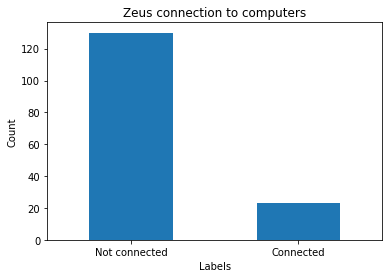

In [34]:
labels = ['Not connected','Connected']
classes = pd.value_counts(data['Zeus'], sort = True)
classes.plot(kind = 'bar', rot=0)
plt.title("Zeus connection to computers")
plt.xticks(range(2), labels)
plt.xlabel("Labels")
plt.ylabel("Count")

Text(0, 0.5, 'Count')

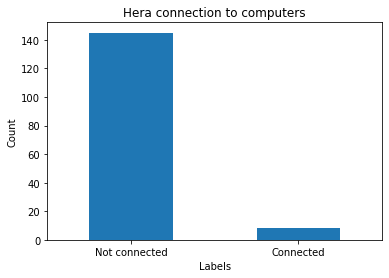

In [35]:
labels = ['Not connected','Connected']
classes = pd.value_counts(data['Hera'], sort = True)
classes.plot(kind = 'bar', rot=0)
plt.title("Hera connection to computers")
plt.xticks(range(2), labels)
plt.xlabel("Labels")
plt.ylabel("Count")

Text(0, 0.5, 'Count')

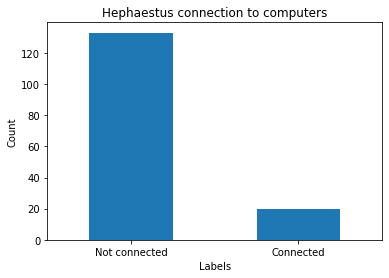

In [36]:
labels = ['Not connected','Connected']
classes = pd.value_counts(data['Hephaestus'], sort = True)
classes.plot(kind = 'bar', rot=0)
plt.title("Hephaestus connection to computers")
plt.xticks(range(2), labels)
plt.xlabel("Labels")
plt.ylabel("Count")

Text(0, 0.5, 'Count')

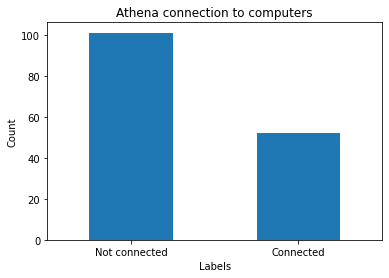

In [181]:
labels = ['Not connected','Connected']
classes = pd.value_counts(data['Athena'], sort = True)
classes.plot(kind = 'bar', rot=0)
plt.title("Athena connection to computers")
plt.xticks(range(2), labels)
plt.xlabel("Labels")
plt.ylabel("Count")

Text(0, 0.5, 'Count')

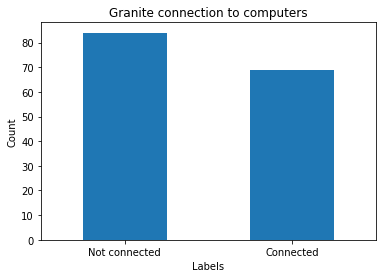

In [38]:
labels = ['Not connected','Connected']
classes = pd.value_counts(data['Granite'], sort = True)
classes.plot(kind = 'bar', rot=0)
plt.title("Granite connection to computers")
plt.xticks(range(2), labels)
plt.xlabel("Labels")
plt.ylabel("Count")

0    84
1    69
Name: Granite, dtype: int64


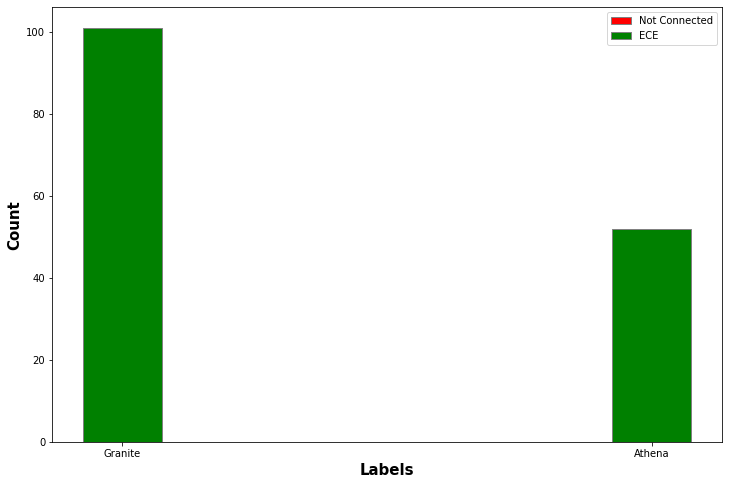

In [179]:
import numpy as np

# set width of bar
barWidth = 0.15
fig = plt.subplots(figsize =(12, 8))
classes = []

# set height of bar
labels = ['Not connected','Connected']
classes.append(pd.value_counts(data['Granite'], sort = True))
classes.append(pd.value_counts(data['Athena'], sort = True))
print(classes[0])

# Set position of bar on X axis
br1 = np.arange(len(classes[0:1]))
br2 = np.arange(len(classes[0:2]))

# Make the plot
plt.bar(br1, classes[0], color ='r', width = barWidth, edgecolor ='grey', label ='Not Connected')
plt.bar(br2, classes[1], color ='g', width = barWidth,edgecolor ='grey', label ='ECE')

 
#plt.bar(br2, classes[1], color ='g', width = barWidth,edgecolor ='grey', label ='Connected')

plt.xlabel("Labels", fontweight ='bold', fontsize = 15)
plt.ylabel("Count", fontweight ='bold', fontsize = 15)
plt.xticks(range(2),['Granite', 'Athena'])

plt.legend()
plt.show()

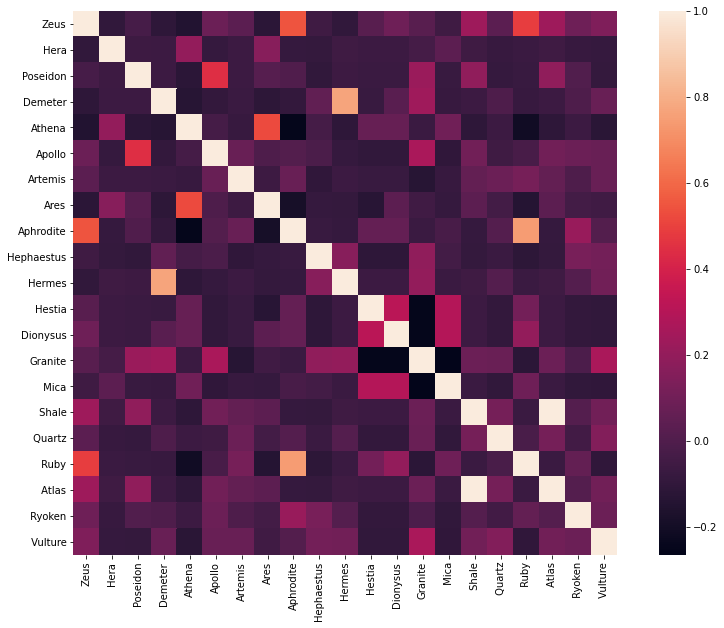

In [39]:
# heat map of correlation of features
#would be good to detail or find out why why computer has really low correlation with some servers(e.g totally black) 
#and some servers are are totally black for others servers, not connected?
#also, maybe after a certain number of connections there is a correlation, like its more red or peach in colour it has many computer number connected in common?
#Will do that later
heapMapCorrFeature = data.corr()
fig = plt.figure(figsize=(15,10))
sns.heatmap(heapMapCorrFeature, square = True)
plt.show()

<br>

<font size="5"> **Distribution of the variables**</font>

<br>

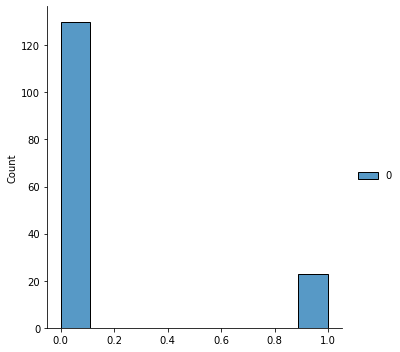

In [40]:
# distribution of Zeus
zeus = [data['Zeus'].values]
sns.displot(zeus)

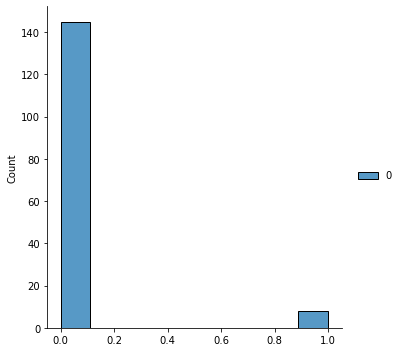

In [41]:
# distribution of Hera
hera = [data['Hera'].values]
sns.displot(hera)

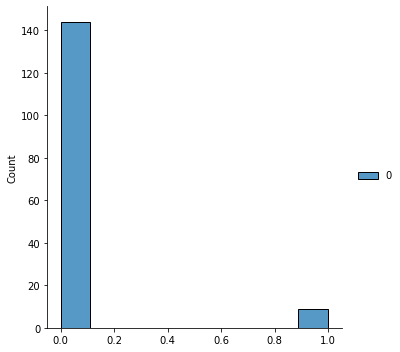

In [42]:
# distribution of Poseidon
poseidon = [data['Poseidon'].values]
sns.displot(poseidon)

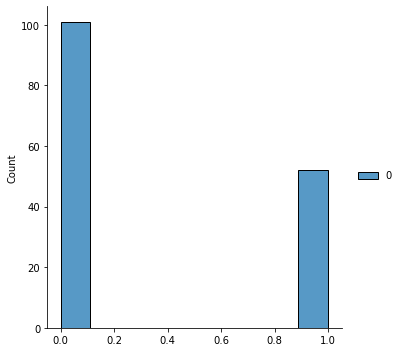

In [43]:
# distribution of Zeus
athena = [data['Athena'].values]
sns.displot(athena)

<br>

<font size="5"> **Plot the graph that shows the links between the computers**</font>

<br>

TESTING THE LINK ANALYSIS CODE - NOT RIGHT!!!

In [23]:
#was using this as reference for the code below
#https://faculty.math.illinois.edu/~riveraq2/teaching/simcamp16/PageRankwithPython.html
import networkx as nx
from numpy import random as nprand

In [24]:
#with open('C:\\Users\\SAMSUNG\\OneDrive\\Documents\\school\\USI\\Modules\\2sem\\Data Analytics/11_Autonomous_Systems.csv', 'r') as nodecsv: # Open the file
#    nodereader = csv.reader(nodecsv) # Read the csv
    #clarifying the data as nodes
#    nodes = [n for n in nodereader][1:]
#len(nodes)
#nodes
#node_names = [n[0] for n in nodes] # Get a list of only the computer numbers
#node_names
#len(nodes)

In [25]:
data = pd.read_csv("C:\\Users\\SAMSUNG\\Documents\\GitHub\\Autonomous-Systems\\11_Autonomous_Systems.csv")
df = pd.DataFrame(data)[1:]
for row, j in df.iterrows():
    print(row, j)
    #print()

1 ComputerNumber    2
Zeus              0
Hera              0
Poseidon          0
Demeter           0
Athena            1
Apollo            0
Artemis           0
Ares              0
Aphrodite         0
Hephaestus        0
Hermes            0
Hestia            1
Dionysus          0
Granite           0
 Mica             1
 Shale            0
 Quartz           0
 Ruby             0
 Atlas            0
 Ryoken           0
 Vulture          0
Name: 1, dtype: int64
2 ComputerNumber    3
Zeus              0
Hera              0
Poseidon          0
Demeter           1
Athena            0
Apollo            0
Artemis           0
Ares              0
Aphrodite         0
Hephaestus        0
Hermes            1
Hestia            0
Dionysus          0
Granite           1
 Mica             0
 Shale            0
 Quartz           0
 Ruby             0
 Atlas            0
 Ryoken           0
 Vulture          0
Name: 2, dtype: int64
3 ComputerNumber    4
Zeus              0
Hera              0
Poseidon  

In [26]:
#dataframeData.append({'ComputerNumber': i+1, 'Newtork':'Zeus'}, ignore_index=True)
        #create a dataframe that uses the source(computer number) and target(network)
        #use the network as nodes and the network as edges? or visa versa?
        
#HAVENT ADDED ALL THE NETWORK YET
dataframeData = pd.DataFrame(columns=['ComputerNumber','Network'])  #creating our source and target using the connected netwrks
data = pd.read_csv("C:\\Users\\SAMSUNG\\Documents\\GitHub\\Autonomous-Systems\\11_Autonomous_Systems.csv")
for i in range(len(data)):
    if data["Zeus"][i] == 1:
        #print(i + 1) #prints the computer number that zeus is connected to
        dataframeData.loc[-1] = [i+1, 'Zeus']
        dataframeData.index = dataframeData.index + 1
        
    if data["Hera"][i] == 1:
        #print(i + 1)
        dataframeData.loc[-1] = [i+1, 'Hera']
        dataframeData.index = dataframeData.index + 1
        
    if data["Poseidon"][i] == 1:
        #print(i + 1)
        dataframeData.loc[-1] = [i+1, 'Poseidon']
        dataframeData.index = dataframeData.index + 1
        
        
    if data["Demeter"][i] == 1:
        #print(i + 1)
        dataframeData.loc[-1] = [i+1, 'Demeter']
        dataframeData.index = dataframeData.index + 1
        
        
    if data["Athena"][i] == 1:
        #print(i + 1)
        dataframeData.loc[-1] = [i+1, 'Athena']
        dataframeData.index = dataframeData.index + 1
        
        
              
    if data["Apollo"][i] == 1:
        #print(i + 1)
        dataframeData.loc[-1] = [i+1, 'Apollo']
        dataframeData.index = dataframeData.index + 1
        
              
    if data["Artemis"][i] == 1:
        #print(i + 1)
        dataframeData.loc[-1] = [i+1, 'Artemis']
        dataframeData.index = dataframeData.index + 1
        
        
              
    if data["Ares"][i] == 1:
        #print(i + 1)
        dataframeData.loc[-1] = [i+1, 'Ares']
        dataframeData.index = dataframeData.index + 1
        
        
              
    if data["Aphrodite"][i] == 1:
        #print(i + 1)
        dataframeData.loc[-1] = [i+1, 'Aphrodite']
        dataframeData.index = dataframeData.index + 1
        
        
              
    if data["Hephaestus"][i] == 1:
        #print(i + 1)
        dataframeData.loc[-1] = [i+1, 'Hephaestus']
        dataframeData.index = dataframeData.index + 1
        
        
              
    if data["Hermes"][i] == 1:
        #print(i + 1)
        dataframeData.loc[-1] = [i+1, 'Hermes']
        dataframeData.index = dataframeData.index + 1
        
        
        
    if data["Hestia"][i] == 1:
        #print(i + 1)
        dataframeData.loc[-1] = [i+1, 'Hestia']
        dataframeData.index = dataframeData.index + 1    
        
        
        
    if data["Dionysus"][i] == 1:
        #print(i + 1)
        dataframeData.loc[-1] = [i+1, 'Dionysus']
        dataframeData.index = dataframeData.index + 1   
        
        
    
    if data["Granite"][i] == 1:
        #print(i + 1)
        dataframeData.loc[-1] = [i+1, 'Granite']
        dataframeData.index = dataframeData.index + 1   
        
        
        
dataframeData.head()

,ComputerNumber,Network
310,1,Athena
309,1,Hestia
308,2,Athena
307,2,Hestia
306,3,Demeter


In [27]:
edges = []
for index, row in dataframeData.iterrows():
    edges.insert( index, row)
    print(index)
    
edges[99][1]

310
309
308
307
306
305
304
303
302
301
300
299
298
297
296
295
294
293
292
291
290
289
288
287
286
285
284
283
282
281
280
279
278
277
276
275
274
273
272
271
270
269
268
267
266
265
264
263
262
261
260
259
258
257
256
255
254
253
252
251
250
249
248
247
246
245
244
243
242
241
240
239
238
237
236
235
234
233
232
231
230
229
228
227
226
225
224
223
222
221
220
219
218
217
216
215
214
213
212
211
210
209
208
207
206
205
204
203
202
201
200
199
198
197
196
195
194
193
192
191
190
189
188
187
186
185
184
183
182
181
180
179
178
177
176
175
174
173
172
171
170
169
168
167
166
165
164
163
162
161
160
159
158
157
156
155
154
153
152
151
150
149
148
147
146
145
144
143
142
141
140
139
138
137
136
135
134
133
132
131
130
129
128
127
126
125
124
123
122
121
120
119
118
117
116
115
114
113
112
111
110
109
108
107
106
105
104
103
102
101
100
99
98
97
96
95
94
93
92
91
90
89
88
87
86
85
84
83
82
81
80
79
78
77
76
75
74
73
72
71
70
69
68
67
66
65
64
63
62
61
60
59
58
57
56
55
54
53
52
51
50
49
48


'Zeus'

In [28]:
G=nx.Graph()

In [29]:
#G.add_nodes_from(node_names)
G.add_edges_from(edges)
print(nx.info(G)) #Graph Info

Name: 
Type: Graph
Number of nodes: 152
Number of edges: 311
Average degree:   4.0921


In [30]:
G

In [31]:
print("Nodes of graph: ")
print(G.nodes())

print()
print()
print()

print("Edges of graph: ")
print(G.edges())

Nodes of graph: 
[153, 'Aphrodite', 1, 'Athena', 'Zeus', 'Hestia', 152, 'Granite', 2, 'Hephaestus', 'Ares', 3, 'Demeter', 'Hermes', 151, 4, 149, 5, 147, 146, 6, 145, 7, 143, 8, 142, 9, 141, 140, 10, 139, 'Artemis', 11, 12, 138, 137, 136, 'Apollo', 13, 'Poseidon', 133, 'Dionysus', 14, 132, 15, 131, 16, 130, 129, 17, 18, 19, 128, 20, 127, 126, 21, 125, 124, 22, 123, 23, 122, 24, 121, 25, 120, 26, 27, 119, 28, 118, 'Hera', 29, 117, 30, 114, 113, 31, 112, 32, 33, 110, 109, 35, 108, 36, 107, 37, 106, 38, 105, 39, 40, 104, 41, 103, 42, 102, 101, 43, 100, 44, 98, 45, 97, 96, 95, 46, 94, 47, 93, 50, 92, 52, 53, 54, 91, 90, 55, 89, 88, 56, 57, 87, 86, 58, 85, 84, 59, 83, 60, 82, 61, 80, 62, 79, 63, 78, 64, 65, 77, 66, 76, 75, 67, 68, 74, 69, 70, 73, 71]



Edges of graph: 
[(153, 'Aphrodite'), (153, 'Zeus'), ('Aphrodite', 16), ('Aphrodite', 18), ('Aphrodite', 19), ('Aphrodite', 20), ('Aphrodite', 21), ('Aphrodite', 22), ('Aphrodite', 24), ('Aphrodite', 27), ('Aphrodite', 29), ('Aphrodite', 30),

In [32]:
#!pip install decorator==5.0.9

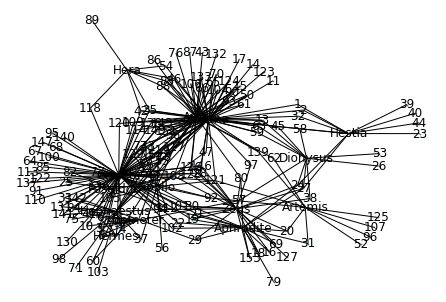

In [33]:
degree = 0.4130
nx.draw(G, with_labels = True, node_size=degree)
node_color = [20000.0 * G.degree(v) for v in G]
plt.show()

In [34]:
density = nx.density(G)
density

0.027100034855350296

In [35]:
fell_whitehead_path = nx.shortest_path(G, source=146, target="Athena")
len(fell_whitehead_path)

2

In [36]:
nx.diameter(G)

6

In [37]:
print(nx.is_connected(G))

True


(-0.8632913223154008,
 1.0887281582054953,
 -0.7609518674092113,
 0.6479406485814305)

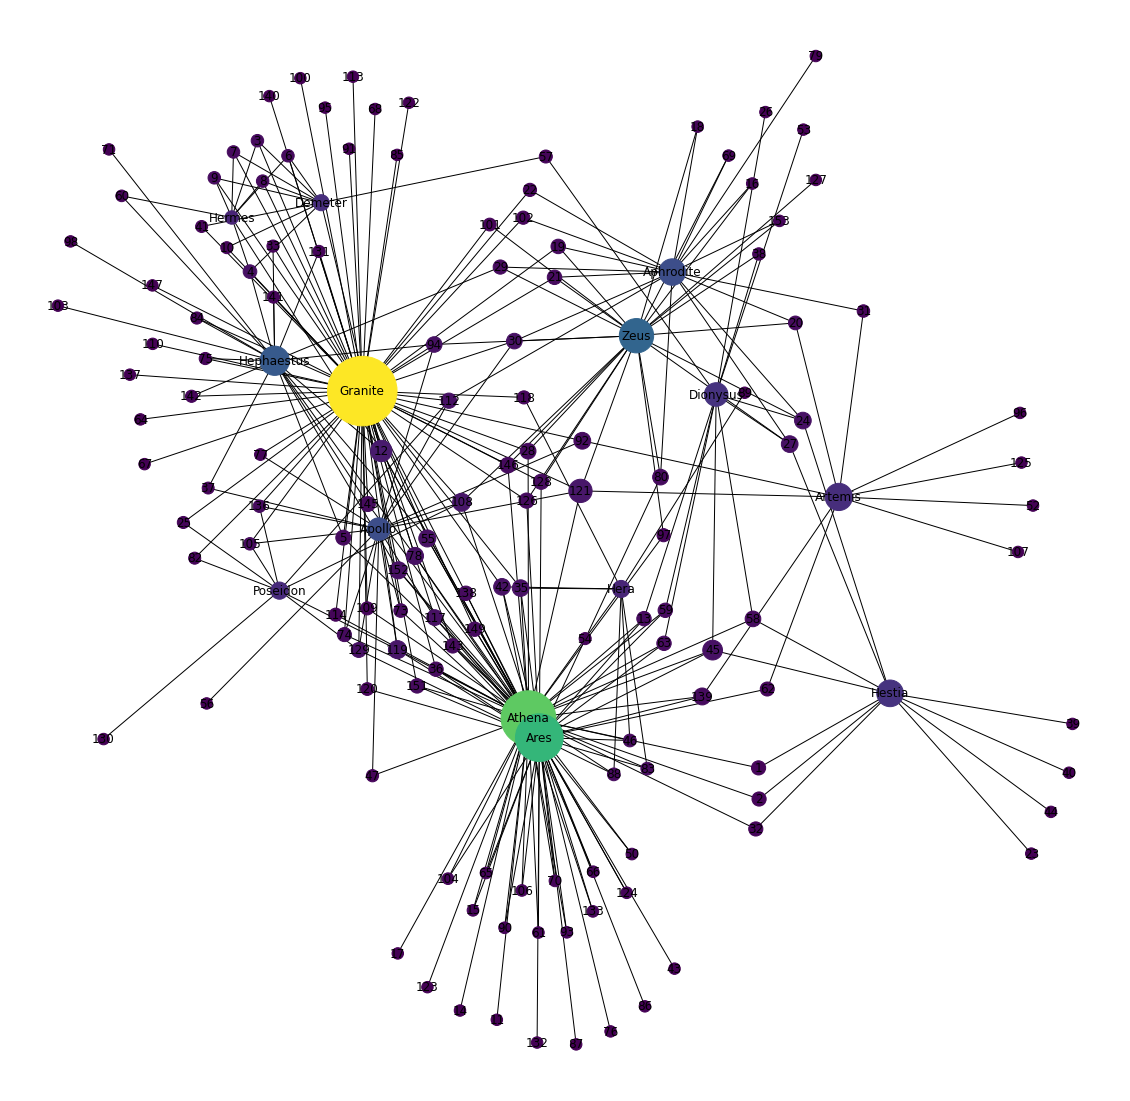

In [38]:
pos = nx.spring_layout(G)
betCent = nx.betweenness_centrality(G, normalized=True, endpoints=True)
node_color = [20000.0 * G.degree(v) for v in G]
node_size =  [v * 10000 for v in betCent.values()]
plt.figure(figsize=(20,20))
nx.draw_networkx(G, pos=pos, with_labels=True,
                 node_color=node_color,
                 node_size=node_size )
plt.axis('off')

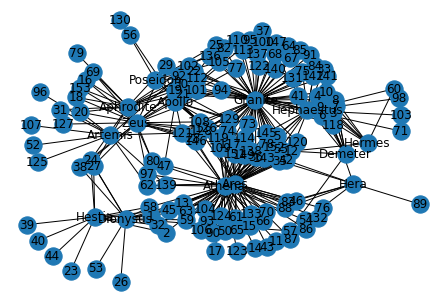

In [39]:
nx.draw_kamada_kawai(G, with_labels = True)

In [102]:
btw_cen = nx.betweenness_centrality(G)
btw_cen

{153: 0.0002316918667295139,
 'Aphrodite': 0.057625653886992936,
 1: 0.006992445479336381,
 'Athena': 0.2909894467123998,
 'Zeus': 0.10596642294415577,
 'Hestia': 0.05855433975473489,
 152: 0.016109813064125976,
 'Granite': 0.4761882911356676,
 2: 0.006992445479336381,
 'Hephaestus': 0.0732355866472482,
 'Ares': 0.21730162280758233,
 3: 0.0024626267438583416,
 'Demeter': 0.012807232628101578,
 'Hermes': 0.004887043018028676,
 151: 0.007745858971188047,
 4: 0.005482041606731677,
 149: 0.007745858971188047,
 5: 0.009323787685385354,
 147: 0.0,
 146: 0.011645835299178547,
 6: 0.0024626267438583416,
 145: 0.009323787685385354,
 7: 0.0024626267438583416,
 143: 0.007745858971188047,
 8: 0.0024626267438583416,
 142: 0.0016824503109642186,
 9: 0.0024626267438583416,
 141: 0.0016824503109642186,
 140: 0.0,
 10: 0.00123948408164852,
 139: 0.01569066181967957,
 'Artemis': 0.06164463224090956,
 11: 0.0,
 12: 0.032708920404983466,
 138: 0.007745858971188047,
 137: 0.0,
 136: 0.002464992344947468,
 

FROM LECTURES NOTES

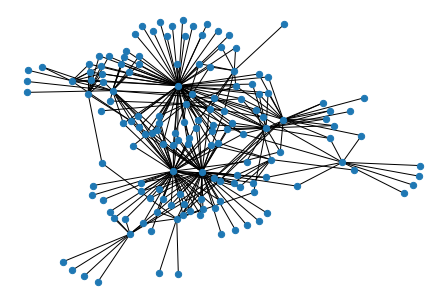

In [85]:
pos = nx.spring_layout(G)
nx.draw(G, pos, node_size =40)


In [87]:
list(G.nodes(data=True))[:20]


[(153, {}),
 ('Aphrodite', {}),
 (1, {}),
 ('Athena', {}),
 ('Zeus', {}),
 ('Hestia', {}),
 (152, {}),
 ('Granite', {}),
 (2, {}),
 ('Hephaestus', {}),
 ('Ares', {}),
 (3, {}),
 ('Demeter', {}),
 ('Hermes', {}),
 (151, {}),
 (4, {}),
 (149, {}),
 (5, {}),
 (147, {}),
 (146, {})]

In [88]:
list(G.edges(data=True))[:10]


[(153, 'Aphrodite', {}),
 (153, 'Zeus', {}),
 ('Aphrodite', 16, {}),
 ('Aphrodite', 18, {}),
 ('Aphrodite', 19, {}),
 ('Aphrodite', 20, {}),
 ('Aphrodite', 21, {}),
 ('Aphrodite', 22, {}),
 ('Aphrodite', 24, {}),
 ('Aphrodite', 27, {})]

In [90]:
print('Density of an undirected istance of the graph:'.ljust(50), str(round(nx.density(G), 3)).ljust(20))


Density of an undirected istance of the graph:     0.027               


In [91]:
print('Transitivity of an undirected istance of the graph: '.ljust(55),str(round(nx.transitivity(G), 3)).ljust(20))


Transitivity of an undirected istance of the graph:     0                   


In [93]:
nx.diameter(G)

6

In [92]:
nx.radius(G)

3

In [94]:
nx.center(G)


['Ares']